# Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### using Keras and Tensorflow >2.0

In [2]:
#pandas_datareader, you can retrieve historical stock prices, 
#option chains, economic indicators, and other financial and economic data from different sources.
import pandas_datareader as pdr
key="************"

## get_data_tiingo is a function provided by the Tiingo API. 
## Tiingo is a financial data provider that offers a RESTful API to access real-time 
## and historical financial data, including stock prices, cryptocurrencies, and news.

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/Users/nirajkc/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
#saving df in csv
df.to_csv('AAPL.csv')

In [5]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-03-12 00:00:00+00:00  181.72  182.39  180.21  180.29  32055405   
       2018-03-13 00:00:00+00:00  179.97  183.50  179.24  182.59  31168404   
       2018-03-14 00:00:00+00:00  178.44  180.52  177.81  180.32  29075469   
       2018-03-15 00:00:00+00:00  178.65  180.24  178.07  178.50  22584565   
       2018-03-16 00:00:00+00:00  178.02  179.12  177.62  178.65  36836456   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-03-12 00:00:00+00:00  43.250740  43.410205  42.891348  42.910389   
       2018-03-13 00:00:00+00:00  42.834226  43.674393  42.660481  43.457806   
       2018-03-14 00:00:00+00:00  42.470075  42.965131  42.320130  42.917529   
       2018-03-15 00:00:00+00:00  42.520056  42.898489  42.382012  42.484355   
       2018-03-16 00:00:00+00:00  42.370112  42.631920  42.274909  42.520056   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-03-12 00:00:00+00:00  128221620      0.0          1.0  
       2018-03-13 00:00:00+00:00  124673616      0.0          1.0  
       2018-03-14 00:00:00+00:00  116301876      0.0          1.0  
       2018-03-15 00:00:00+00:00   90338260      0.0          1.0  
       2018-03-16 00:00:00+00:00  147345824      0.0          1.0

In [6]:
df.tail()

close      high       low     open  \
symbol date                                                             
AAPL   2023-03-06 00:00:00+00:00  153.83  156.3000  153.4600  153.785   
       2023-03-07 00:00:00+00:00  151.60  154.0299  151.1300  153.700   
       2023-03-08 00:00:00+00:00  152.87  153.4700  151.8300  152.810   
       2023-03-09 00:00:00+00:00  150.59  154.5350  150.2250  153.559   
       2023-03-10 00:00:00+00:00  148.50  150.9400  147.6096  150.210   

                                    volume  adjClose   adjHigh    adjLow  \
symbol date                                                                
AAPL   2023-03-06 00:00:00+00:00  87558028    153.83  156.3000  153.4600   
       2023-03-07 00:00:00+00:00  56182028    151.60  154.0299  151.1300   
       2023-03-08 00:00:00+00:00  47204791    152.87  153.4700  151.8300   
       2023-03-09 00:00:00+00:00  53833582    150.59  154.5350  150.2250   
       2023-03-10 00:00:00+00:00  68572400    148.50  150.9400  147.6096   

                                  adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                 
AAPL   2023-03-06 00:00:00+00:00  153.785   87558028      0.0          1.0  
       2023-03-07 00:00:00+00:00  153.700   56182028      0.0          1.0  
       2023-03-08 00:00:00+00:00  152.810   47204791      0.0          1.0  
       2023-03-09 00:00:00+00:00  153.559   53833582      0.0          1.0  
       2023-03-10 00:00:00+00:00  150.210   68572400      0.0          1.0

So, we gave data from 2018-03-12 to 2023-03-10

In [7]:
df.shape

(1259, 12)

In [8]:
#extracting only df1 column
df1=df.reset_index()["close"]

In [9]:
df1

0       181.72
1       179.97
2       178.44
3       178.65
4       178.02
         ...  
1254    153.83
1255    151.60
1256    152.87
1257    150.59
1258    148.50
Name: close, Length: 1259, dtype: float64

In [10]:

df1.shape

(1259,)

<AxesSubplot:>

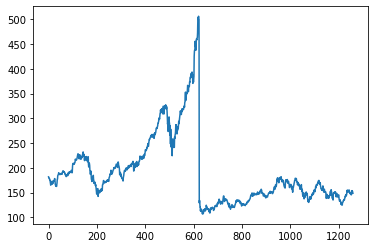

In [11]:
import matplotlib.pyplot as plt
df1.plot()

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) #reshape is (-1, 1), which tells numpy to automatically calculate
                                                 # appropriate number of rows based on the size of the input array, with only 1 column

In [13]:
df1

array([[0.18755166],
       [0.18316844],
       [0.17933626],
       ...,
       [0.11529117],
       [0.10958046],
       [0.10434565]])

In [14]:
df1.shape

(1259, 1)

In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [16]:
train_data.shape, test_data.shape

((818, 1), (441, 1))

In [17]:
train_data

array([[1.87551659e-01],
       [1.83168441e-01],
       [1.79336255e-01],
       [1.79862242e-01],
       [1.78284283e-01],
       [1.71471509e-01],
       [1.71321227e-01],
       [1.61377583e-01],
       [1.55316218e-01],
       [1.45522855e-01],
       [1.65134627e-01],
       [1.54038823e-01],
       [1.49380088e-01],
       [1.52636193e-01],
       [1.49881027e-01],
       [1.54164058e-01],
       [1.62229180e-01],
       [1.65209768e-01],
       [1.54139011e-01],
       [1.58321853e-01],
       [1.66336882e-01],
       [1.64308078e-01],
       [1.68566061e-01],
       [1.70043832e-01],
       [1.72773951e-01],
       [1.78835316e-01],
       [1.77833438e-01],
       [1.65209768e-01],
       [1.47476518e-01],
       [1.46274264e-01],
       [1.40513463e-01],
       [1.42291797e-01],
       [1.43719474e-01],
       [1.38960551e-01],
       [1.46324358e-01],
       [1.55942392e-01],
       [1.74652473e-01],
       [1.75453976e-01],
       [1.92836569e-01],
       [1.96167815e-01],


In [18]:
test_data

array([[0.0482655 ],
       [0.05137132],
       [0.05921102],
       [0.05710708],
       [0.05838447],
       [0.06249217],
       [0.05916093],
       [0.06376957],
       [0.06797746],
       [0.06727614],
       [0.06654978],
       [0.06579837],
       [0.06998121],
       [0.07386349],
       [0.07544145],
       [0.07621791],
       [0.08295554],
       [0.08811522],
       [0.09450219],
       [0.09117095],
       [0.09585473],
       [0.09432686],
       [0.09718222],
       [0.1059737 ],
       [0.10429555],
       [0.09906074],
       [0.08919224],
       [0.09845961],
       [0.09658109],
       [0.10008766],
       [0.10449593],
       [0.10557295],
       [0.10001252],
       [0.09552912],
       [0.09718222],
       [0.09773325],
       [0.09688165],
       [0.10149029],
       [0.10046337],
       [0.10073889],
       [0.09843456],
       [0.09830933],
       [0.09708203],
       [0.09773325],
       [0.10532248],
       [0.10584847],
       [0.11090795],
       [0.108

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###for i=0, dataX -> 0,1,2,3-----99   dataY -> 100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In X_train, we have 100 features whereas in the y_train I have only one feature

In [22]:
#Similarly shape of test dataset
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [23]:
# before doing LSTM we need to reshape into 3 dimension
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
!pip install tensorflow
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2023-03-11 14:13:42.528158: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Creating a sequential model with three LSTM layers and one dense layer.

The first LSTM layer has 50 units, returns sequences (because return_sequences=True), and takes input of shape (100,1). This means that it expects input sequences of length 100, where each time step has one feature.

If you don't specify an activation function, the default is the hyperbolic tangent (tanh) activation function, which is a common choice for LSTMs.
If you want to use a different activation function, you can specify it using the activation argument. Some commonly used activation functions for LSTMs include:

relu: Rectified Linear Unit, which returns the input if it is positive, and 0 otherwise.
sigmoid: Sigmoid function, which maps the input to a range between 0 and 1.
tanh: Hyperbolic tangent function, which maps the input to a range between -1 and 1.
softmax: Softmax function, which maps the input to a probability distribution over multiple categories.
The second LSTM layer also has 50 units and returns sequences.

The third LSTM layer has 50 units and does not return sequences.

The dense layer has one output unit and is used to make predictions.

The model is compiled using mean squared error as the loss function and the Adam optimizer.

The optimizer adjusts the weights and biases of the neural network during training in order to minimize the loss function, while the activation function is applied to the output of a neuron to introduce non-linearity into the neural network.. There are several optimizers that can be used, including Adam, stochastic gradient descent, and others.

In [25]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2023-03-11 14:13:52.826582: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
# verbose=1 means that progress bars will be displayed for each epoch of training

In [29]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 205ms/step - loss: 0.0336 - val_loss: 7.8226e-04
Epoch 2/100
12/12 [==============================] - 1s 115ms/step - loss: 0.0129 - val_loss: 5.1856e-04
Epoch 3/100
12/12 [==============================] - 1s 115ms/step - loss: 0.0099 - val_loss: 5.0266e-04
Epoch 4/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0086 - val_loss: 7.0536e-04
Epoch 5/100
12/12 [==============================] - 1s 125ms/step - loss: 0.0076 - val_loss: 9.6633e-04
Epoch 6/100
12/12 [==============================] - 1s 124ms/step - loss: 0.0068 - val_loss: 4.1478e-04
Epoch 7/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0065 - val_loss: 4.6250e-04
Epoch 8/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0056 - val_loss: 3.4247e-04
Epoch 9/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0062 - val_loss: 3.5651e-04
Epoch 10/100
12/12 [==============================] - 1

In [30]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 20ms/step


In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

223.7670100918856

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

149.89984044040824

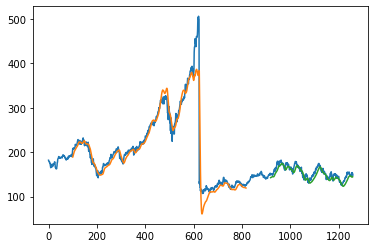

In [37]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

441

In [39]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [43]:
x_input

array([[[0.09362555],
        [0.08598622],
        [0.10316844],
        [0.10386976],
        [0.10261741],
        [0.09966187],
        [0.0903444 ],
        [0.08541014],
        [0.08969317],
        [0.08846587],
        [0.09430182],
        [0.09675642],
        [0.0910958 ],
        [0.07428929],
        [0.06930495],
        [0.0639449 ],
        [0.06376957],
        [0.07165936],
        [0.06359424],
        [0.0626675 ],
        [0.05808391],
        [0.04809017],
        [0.05703193],
        [0.05783344],
        [0.04566061],
        [0.04889167],
        [0.04553538],
        [0.05705698],
        [0.05838447],
        [0.05983719],
        [0.06675016],
        [0.06654978],
        [0.06993112],
        [0.07288666],
        [0.07105823],
        [0.07120852],
        [0.07772073],
        [0.08583594],
        [0.08939261],
        [0.08771446],
        [0.09297433],
        [0.09790858],
        [0.09056982],
        [0.09380088],
        [0.09665623],
        [0

In [40]:
#converiting to list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
#Printing previous 100 data
temp_input

[0.08909204758922978,
 0.0924483406386975,
 0.09272385723231058,
 0.09154664996869122,
 0.1012648716343143,
 0.10672510958046327,
 0.11396368190356915,
 0.10647463994990602,
 0.09507827175954914,
 0.1224796493425172,
 0.11646837820914213,
 0.10973074514715087,
 0.0956543519098309,
 0.08025046963055726,
 0.07899812147777074,
 0.08035065748278014,
 0.08180338134001247,
 0.07020663744520972,
 0.10026299311208514,
 0.10735128365685653,
 0.103794614902943,
 0.10820288040075132,
 0.10507201001878513,
 0.10990607388854096,
 0.11133375078271751,
 0.10311834690043825,
 0.10855353788353161,
 0.11078271759549146,
 0.10336881653099561,
 0.09362554790231681,
 0.08598622417031926,
 0.10316844082654975,
 0.10386975579211016,
 0.1026174076393237,
 0.0996618659987476,
 0.09034439574201625,
 0.08541014402003755,
 0.08969317470256727,
 0.08846587351283652,
 0.0943018159048215,
 0.096756418284283,
 0.09109580463368816,
 0.07428929242329363,
 0.06930494677520344,
 0.06394489668127734,
 0.06376956793988725,

In [ ]:

The code uses a while loop that runs for 30 iterations, and in each iteration, 
it checks if the length of the input sequence temp_input is greater than n_steps (which is set to 100).
If the length is greater, it uses the last n_steps values from the input sequence as input to the model, 
generates a prediction using the model.predict() method, and adds the prediction to the input sequence. 
It then appends the prediction to the lst_output list.

If the length of the input sequence is less than n_steps,
it uses the entire input sequence as input to the model to generate a prediction.
The generated prediction is then added to the input sequence and appended to the lst_output list,
 predictions for the next 30 time steps in a time series dataset, 
using a sliding window approach where the model is trained to predict the next 
value based on the last n_steps values in the input sequence. 
The predictions are stored in the lst_output list, which can be used for further analysis or visualization.

In [44]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:]) # from 2nd elements..
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1)) #resshaping 3 dim.
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0]) #predicting new value
        temp_input.extend(yhat[0].tolist()) 
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) #appending to the list 
        i=i+1
    

print(lst_output)

0 day input [0.08598622 0.10316844 0.10386976 0.10261741 0.09966187 0.0903444
 0.08541014 0.08969317 0.08846587 0.09430182 0.09675642 0.0910958
 0.07428929 0.06930495 0.0639449  0.06376957 0.07165936 0.06359424
 0.0626675  0.05808391 0.04809017 0.05703193 0.05783344 0.04566061
 0.04889167 0.04553538 0.05705698 0.05838447 0.05983719 0.06675016
 0.06654978 0.06993112 0.07288666 0.07105823 0.07120852 0.07772073
 0.08583594 0.08939261 0.08771446 0.09297433 0.09790858 0.09056982
 0.09380088 0.09665623 0.11015654 0.11937383 0.11243582 0.11974953
 0.11291171 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272
 0.11739512 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224
 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568
 0.11211021 0.11529117 0.10958046 0.10434565 0.09588573 0.09564446
 0.0946311  0.09306837 0.09115536 0.08903443 0.0867958  0.0844947
 0.08216307 0.07982065 0.07748356 0.07515783 0.07284857 0.07055799
 0.06828665 0.06603476 0.06380059 0.06158122 0.059371

In [45]:
day_new=np.arange(1,101) #indexing 100 data
day_pred=np.arange(101,131) #indexing next 30 days data

In [46]:
import matplotlib.pyplot as plt


In [47]:
#Total data
len(df1)

1259

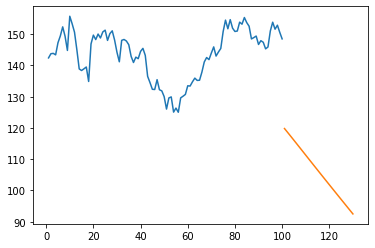

In [49]:
#taking only 100 data
#Prediction of next 30 days
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

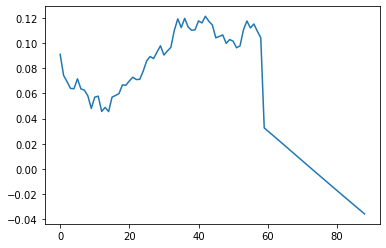

In [50]:
#alternatively, combining df1, lst_output
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])